#Importing Libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.6/519.6 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 23.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 19.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.8/294.8 kB 36.3 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from datasets import Dataset

In [ ]:
train_data=pd.read_json('/content/drive/MyDrive/train.jsonl',lines=True)
test_data=pd.read_json('/content/drive/MyDrive/test.jsonl',lines=True)
val_data=pd.read_json('/content/drive/MyDrive/validation.jsonl',lines=True)

In [ ]:
train_data=Dataset.from_pandas(train_data)
test_data=Dataset.from_pandas(test_data)
val_data=Dataset.from_pandas(val_data)

In [ ]:
train_data = train_data.with_format(type='torch', columns=['text', 'label']) #need to change the data according to torch model
valid_data = val_data.with_format(type='torch', columns=['text', 'label'])
test_data = test_data.with_format(type='torch', columns=['text', 'label'])

In [ ]:
train_data

Dataset({
    features: ['text', 'label'],
    num_rows: 16000
})

In [ ]:
test_data

Dataset({
    features: ['text', 'label'],
    num_rows: 2000
})

In [ ]:
val_data

Dataset({
    features: ['text', 'label'],
    num_rows: 2000
})

In [ ]:
import torch
import torch.nn as nn

In [ ]:
device = torch.device("cuda")

In [ ]:
!pip install tensorflow-text
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 16.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 41.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 49.6 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import functools
import sys


In [ ]:
import tensorflow_text as text

In [ ]:
import tensorflow as tf
from transformers import BertTokenizer, TFBertForSequenceClassification
from transformers import InputExample, InputFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


In [ ]:
import pandas as pd
import tensorflow as tf
import tensorflow_hub as hub
import json
from pandas.core.indexes.api import textwrap
import string
import re
from nltk.corpus import stopwords

##Importing training data

In [ ]:


jsonl_file_path_training = "/content/drive/MyDrive/train.jsonl"

data_training = []

with open(jsonl_file_path_training, 'r') as file:
    for line in file:
        data_training.append(json.loads(line))


In [ ]:
data_frame_training = pd.DataFrame(data_training)


In [ ]:
data_frame_training.head(5)

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


In [ ]:
data_frame_training.label.value_counts()

1    5362
0    4666
3    2159
4    1937
2    1304
5     572
Name: label, dtype: int64

#importing testing data

In [ ]:


jsonl_file_path_testing = "/content/drive/MyDrive/test.jsonl"

data_testing = []

with open(jsonl_file_path_testing, 'r') as file:
    for line in file:
        data_testing.append(json.loads(line))


In [ ]:
data_frame_testing = pd.DataFrame(data_testing)


In [ ]:
data_frame_testing.head(5)

,text,label
0,im feeling rather rotten so im not very ambiti...,0
1,im updating my blog because i feel shitty,0
2,i never make her separate from me because i do...,0
3,i left with my bouquet of red and yellow tulip...,1
4,i was feeling a little vain when i did this one,0


In [ ]:
data_frame_testing.label.value_counts()

1    695
0    581
3    275
4    224
2    159
5     66
Name: label, dtype: int64

#Importing validation data

In [ ]:


jsonl_file_path_validation = "/content/drive/MyDrive/validation.jsonl"

data_validation = []

with open(jsonl_file_path_validation, 'r') as file:
    for line in file:
        data_validation.append(json.loads(line))


In [ ]:
data_frame_validation = pd.DataFrame(data_validation)


In [ ]:
data_frame_validation.head(5)


,text,label
0,im feeling quite sad and sorry for myself but ...,0
1,i feel like i am still looking at a blank canv...,0
2,i feel like a faithful servant,2
3,i am just feeling cranky and blue,3
4,i can have for a treat or if i am feeling festive,1


In [ ]:
data_frame_validation.label.value_counts()

1    704
0    550
3    275
4    212
2    178
5     81
Name: label, dtype: int64

##Size of datasets in train,test and validation

In [ ]:
print('Training dataset size  ',data_frame_training.shape)
print('Testing dataset size   ',data_frame_testing.shape)
print('Validation dataset size',data_frame_validation.shape)

Training dataset size   (16000, 2)
Testing dataset size    (2000, 2)
Validation dataset size (2000, 2)


 ### Labels in our dataset
######0-Neutral  
######1- Happy
######2- joy
######3- Disappointment/disapproval
######4- Sadness
######5- Depressed

In [ ]:
data_frame_training['label']=data_frame_training['label'].replace(0,'Depressed') #changing labels
data_frame_training['label']=data_frame_training['label'].replace(1,'Neutral')
data_frame_training['label']=data_frame_training['label'].replace(2,'Joy')
data_frame_training['label']=data_frame_training['label'].replace(3,'Sadness')
data_frame_training['label']=data_frame_training['label'].replace(4,'Disapointment')
data_frame_training['label']=data_frame_training['label'].replace(5,'Happy')

###Changing testing labels

In [ ]:
data_frame_testing['label']=data_frame_testing['label'].replace(0,'Depressed') #label encoding the output column labels
data_frame_testing['label']=data_frame_testing['label'].replace(1,'Neutral')
data_frame_testing['label']=data_frame_testing['label'].replace(2,'Joy')
data_frame_testing['label']=data_frame_testing['label'].replace(3,'Sadness')
data_frame_testing['label']=data_frame_testing['label'].replace(4,'Disapointment')
data_frame_testing['label']=data_frame_testing['label'].replace(5,'Happy')

###Changing validation labels

In [ ]:
data_frame_validation['label']=data_frame_validation['label'].replace(0,'Depressed')
data_frame_validation['label']=data_frame_validation['label'].replace(1,'Neutral')
data_frame_validation['label']=data_frame_validation['label'].replace(2,'Joy')
data_frame_validation['label']=data_frame_validation['label'].replace(3,'Sadness')
data_frame_validation['label']=data_frame_validation['label'].replace(4,'Disapointment')
data_frame_validation['label']=data_frame_validation['label'].replace(5,'Happy')

In [ ]:
data_frame_training.head(5)

,text,label
0,i didnt feel humiliated,Depressed
1,i can go from feeling so hopeless to so damned...,Depressed
2,im grabbing a minute to post i feel greedy wrong,Sadness
3,i am ever feeling nostalgic about the fireplac...,Joy
4,i am feeling grouchy,Sadness


In [ ]:
priority_order = {'Depressed': 5, 'Sadness': 4, 'Disapointment': 3,'Neutral':2,'Happy':1,'Joy':0}
data_frame_training['label'] = data_frame_training['label'].map(priority_order)
data_frame_testing['label'] = data_frame_testing['label'].map(priority_order)
data_frame_validation['label'] = data_frame_validation['label'].map(priority_order)

<Axes: ylabel='label'>

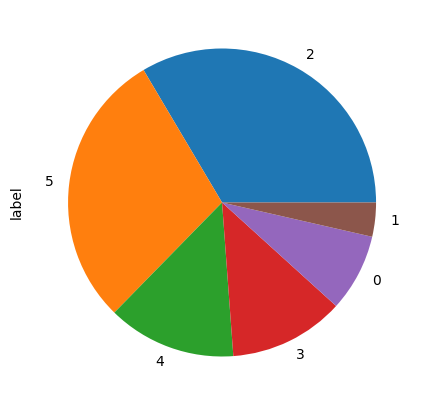

In [ ]:
data_frame_training.label.value_counts().plot(kind='pie', figsize=(5,5))


In [ ]:
data_frame_training.label.value_counts()

2    5362
5    4666
4    2159
3    1937
0    1304
1     572
Name: label, dtype: int64

#Text cleaning

In [ ]:


def cleaning(text):
  text = text.lower()
  #  removing punctuations
  text = text.translate(str.maketrans("", "", string.punctuation))
  #removing numbers
  text = re.sub(r'\d+', '', text)
  #removing extra white spaces
  text = ' '.join(text.split())
  #removing urls
  text = re.sub(r'http\S+', '', text)
  #removing special characters
  text = ''.join(char for char in text if char.isprintable())


  # removing stop words
  stop_words = set(stopwords.words('english'))
  words = text.split()
  cleaned_words = [word for word in words if word.lower() not in stop_words]
  text = ' '.join(cleaned_words)

  return text




In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
data_frame_testing['text'] = data_frame_testing['text'].apply(lambda text: cleaning(text))
data_frame_training['text'] = data_frame_training['text'].apply(lambda text: cleaning(text))
data_frame_validation['text'] = data_frame_validation['text'].apply(lambda text: cleaning(text))


In [ ]:
data_frame_training.head()

,text,label
0,didnt feel humiliated,5
1,go feeling hopeless damned hopeful around some...,5
2,im grabbing minute post feel greedy wrong,4
3,ever feeling nostalgic fireplace know still pr...,0
4,feeling grouchy,4


In [ ]:
data_frame_training['label'].shape

(16000,)

In [ ]:
X_train=data_frame_training['text']
X_test=data_frame_testing['text']
X_validation=data_frame_validation['text']
y_train=data_frame_training['label']
y_test=data_frame_testing['label']
y_validation=data_frame_validation['label']

#BERT

In [ ]:
from transformers import AutoTokenizer,TFBertModel
tokenizer = AutoTokenizer.from_pretrained('bert-base-cased')
bert = TFBertModel.from_pretrained('bert-base-cased')

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [ ]:
import torch.nn as nn
import torch.optim as optim
import torchtext
import tqdm

#Split the dataset

In [ ]:
X_train=data_frame_training['text']
y_train=data_frame_training['label']
X_test=data_frame_testing['text']
y_test=data_frame_testing['label']
X_val=data_frame_validation['text']
y_val=data_frame_validation['label']

In [ ]:
y_train.shape

(16000,)

#Bert and Bert Tokenizer Pytorch

In [ ]:
def tokenize_and_numericalize_data(example, tokenizer):
    ids = tokenizer(example['text'], truncation=True)['input_ids']
    return {'ids': ids}

    # returning input ids mapping the text

In [ ]:
from datasets import Dataset
# data_frame_training=Dataset.from_pandas(data_frame_training)
data_frame_testing=Dataset.from_pandas(data_frame_testing)
data_frame_validation=Dataset.from_pandas(data_frame_validation)

In [ ]:
train_data = data_frame_training.map(tokenize_and_numericalize_data, fn_kwargs={'tokenizer': tokenizer}) #tokenizing the training dataset

test_data = data_frame_testing.map(tokenize_and_numericalize_data, fn_kwargs={'tokenizer': tokenizer}) #tokenizing the testing dataset
val_data=data_frame_validation.map(tokenize_and_numericalize_data,fn_kwargs={'tokenizer':tokenizer})#tokenizing the validation dataset

AttributeError: ignored

In [ ]:
!pip install transformers

In [ ]:
import transformers
transformer_name = 'bert-base-uncased'
transformer = transformers.AutoModel.from_pretrained(transformer_name) #importing the model

In [ ]:
#pytorch class transformers (fine tuning bert)
class Transformer(nn.Module):
    def __init__(self, transformer, output_dim, freeze):
        super().__init__()
        self.transformer = transformer
        hidden_dim = transformer.config.hidden_size
        self.fc = nn.Linear(hidden_dim, output_dim)

        if freeze:
            for param in self.transformer.parameters():
                param.requires_grad = False

    def forward(self, ids):
        # ids = [batch size, seq len]
        output = self.transformer(ids, output_attentions=True)
        hidden = output.last_hidden_state
        # hidden = [batch size, seq len, hidden dim]
        attention = output.attentions[-1]
        # attention = [batch size, n heads, seq len, seq len]
        cls_hidden = hidden[:,0,:]
        prediction = self.fc(torch.tanh(cls_hidden))
        # prediction = [batch size, output dim]
        return prediction

##Freezing the weights of pretrained bert for fine tuning

In [ ]:
output_dim = len(train_data['label'].unique())
freeze = False

model = Transformer(transformer, output_dim, freeze)

In [ ]:
output_dim

In [ ]:
def count_parameters(model): #counting total parameters
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f'The model has {count_parameters(model):,} trainable parameters')

In [ ]:
lr = 1e-5

optimizer = optim.Adam(model.parameters(), lr=lr)

In [ ]:
criterion = nn.CrossEntropyLoss()

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)
model = model.to(device)
criterion = criterion.to(device)

###creating batches

In [ ]:
def collate(batch, pad_index):
    batch_ids = [i['ids'] for i in batch]
    batch_ids = nn.utils.rnn.pad_sequence(batch_ids, padding_value=pad_index, batch_first=True)
    batch_label = [i['label'] for i in batch]
    batch_label = torch.stack(batch_label)
    batch = {'ids': batch_ids,
             'label': batch_label}
    return batch

In [ ]:
pad_index = tokenizer.pad_token_id
seed=0
torch.manual_seed(seed)

##creating Dataloaders

In [ ]:
batch_size = 8

collate = functools.partial(collate, pad_index=pad_index)

train_dataloader = torch.utils.data.DataLoader(train_data,
                                               batch_size=batch_size,
                                               collate_fn=collate,
                                               shuffle=True)

valid_dataloader = torch.utils.data.DataLoader(valid_data, batch_size=batch_size, collate_fn=collate)
test_dataloader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, collate_fn=collate)

##Training the bert

In [ ]:

def train(dataloader, model, criterion, optimizer, device):

    model.train()
    epoch_losses = []
    epoch_accs = []

    for batch in tqdm.tqdm(dataloader, desc='training...', file=sys.stdout):
        ids = batch['ids'].to(device)
        label = batch['label'].to(device)
        prediction = model(ids)
        loss = criterion(prediction, label)
        accuracy = get_accuracy(prediction, label)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        epoch_losses.append(loss.item())
        epoch_accs.append(accuracy.item())

    return epoch_losses, epoch_accs

In [ ]:
import tqdm
import sys

def train(dataloader, model, criterion, optimizer, device):
    model.train()
    epoch_losses = []
    epoch_accs = []

    for batch in tqdm.tqdm(dataloader, desc='Training...', file=sys.stdout):
        ids = batch['ids'].to(device)
        label = batch['label'].to(device)

        optimizer.zero_grad()

        # Forward pass
        predictions = model(ids)
        loss = criterion(predictions, label)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        # Calculate accuracy
        accuracy = get_accuracy(predictions, label)

        # Append loss and accuracy to epoch lists
        epoch_losses.append(loss.item())
        epoch_accs.append(accuracy)

    return epoch_losses, epoch_accs


#Evaluating function

In [ ]:
def evaluate(dataloader, model, criterion, device):

    model.eval()
    epoch_losses = []
    epoch_accs = []

    with torch.no_grad():
        for batch in tqdm.tqdm(dataloader, desc='evaluating...', file=sys.stdout):
            ids = batch['ids'].to(device)
            label = batch['label'].to(device)
            prediction = model(ids)
            loss = criterion(prediction, label)
            accuracy = get_accuracy(prediction, label)
            epoch_losses.append(loss.item())
            epoch_accs.append(accuracy)

    return epoch_losses, epoch_accs

In [ ]:
def get_accuracy(prediction, label):
    batch_size, _ = prediction.shape
    predicted_classes = prediction.argmax(dim=-1)
    #correct_predictions = predicted_classes.eq(label).sum()
    correct_predictions = (predicted_classes == label).sum().item()
    accuracy = correct_predictions / batch_size
    return accuracy

In [ ]:
n_epochs = 5
best_valid_loss = float('inf')

train_losses = []
train_accs = []
valid_losses = []
valid_accs = []

for epoch in range(n_epochs):

    train_loss, train_acc = train(train_dataloader, model, criterion, optimizer, device)
    valid_loss, valid_acc = evaluate(valid_dataloader, model, criterion, device)

    train_losses.extend(train_loss)
    train_accs.extend(train_acc)
    valid_losses.extend(valid_loss)
    valid_accs.extend(valid_acc)

    epoch_train_loss = np.mean(train_loss)
    epoch_train_acc = np.mean(train_acc)
    epoch_valid_loss = np.mean(valid_loss)
    epoch_valid_acc = np.mean(valid_acc)

    if epoch_valid_loss < best_valid_loss:
        best_valid_loss = epoch_valid_loss
        torch.save(model.state_dict(), 'transformer.pt')

    print(f'Epoch: {epoch+1}/{n_epochs}')
    print(f'Train Loss: {epoch_train_loss:.3f}, Train Accuracy: {epoch_train_acc:.3f}')
    print(f'Validation Loss: {epoch_valid_loss:.3f}, Validation Accuracy: {epoch_valid_acc:.3f}')
    print()




NameError: ignored

#Plotting the graphs

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
# Plotting the training and validation losses
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Train Loss')
plt.plot(valid_losses, label='Validation Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

# Plotting the training and validation accuracies
plt.figure(figsize=(10, 5))
plt.plot(train_accs, label='Train Accuracy')
plt.plot(valid_accs, label='Validation Accuracy')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

In [ ]:

model.load_state_dict(torch.load('transformer.pt'))

test_loss, test_acc = evaluate(test_dataloader, model, criterion, device)

epoch_test_loss = np.mean(test_loss)
epoch_test_acc = np.mean(test_acc)

print(f'test_loss: {epoch_test_loss:.3f}, test_acc: {epoch_test_acc:.3f}')

In [ ]:
def predict(text, model, tokenizer, device):
    ids = tokenizer(text)['input_ids']
    tensor = torch.LongTensor(ids).unsqueeze(dim=0).to(device)
    prediction = model(tensor).squeeze(dim=0)
    probability = torch.softmax(prediction, dim=-1)
    predicted_class = prediction.argmax(dim=-1).item()
    predicted_probability = probability[predicted_class].item()
    return predicted_class, predicted_probability

In [ ]:
text = "This film is terrible!"

predict(text, model, tokenizer, device)

In [ ]:
text = "This film is great!"

predict_sentiment(text, model, tokenizer, device)